In [139]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
df=pd.read_csv("C:/Users/91866/Downloads/Diabetespred.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(499, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               499 non-null    int64  
 1   Glucose                   499 non-null    int64  
 2   BloodPressure             499 non-null    int64  
 3   SkinThickness             499 non-null    int64  
 4   Insulin                   499 non-null    int64  
 5   BMI                       499 non-null    float64
 6   DiabetesPedigreeFunction  499 non-null    float64
 7   Age                       499 non-null    int64  
 8   Outcome                   499 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 35.2 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df['Outcome'] = df['Outcome'].apply(lambda x : 'yes' if x!=0 else 'no')

In [8]:
df['Outcome'].value_counts()

no     317
yes    182
Name: Outcome, dtype: int64

In [9]:
df = df.astype({"Outcome": object})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               499 non-null    int64  
 1   Glucose                   499 non-null    int64  
 2   BloodPressure             499 non-null    int64  
 3   SkinThickness             499 non-null    int64  
 4   Insulin                   499 non-null    int64  
 5   BMI                       499 non-null    float64
 6   DiabetesPedigreeFunction  499 non-null    float64
 7   Age                       499 non-null    int64  
 8   Outcome                   499 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 35.2+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,499.0,3.803607,3.345786,0.000,1.000,3.000,6.0000,17.00
Glucose,499.0,121.354709,32.441489,0.000,100.000,117.000,142.0000,197.00
BloodPressure,499.0,68.743487,19.452608,0.000,64.000,70.000,80.0000,122.00
SkinThickness,499.0,20.575150,15.720190,0.000,0.000,23.000,33.0000,63.00
Insulin,499.0,80.390782,119.774561,0.000,0.000,36.000,122.0000,846.00
BMI,499.0,31.984569,8.210358,0.000,27.050,32.000,36.6000,67.10
DiabetesPedigreeFunction,499.0,0.485377,0.345546,0.078,0.252,0.383,0.6335,2.42
Age,499.0,33.086172,11.636849,21.000,24.000,29.000,39.5000,81.00


In [12]:
y=df.Outcome

In [13]:
df.Pregnancies.value_counts(normalize=True)

1     0.166333
0     0.156313
2     0.128257
4     0.098196
5     0.096192
3     0.088176
7     0.068136
8     0.050100
6     0.048096
9     0.034068
10    0.026052
12    0.012024
13    0.012024
11    0.008016
14    0.004008
15    0.002004
17    0.002004
Name: Pregnancies, dtype: float64

In [14]:
df.Glucose.value_counts(normalize=True)

100    0.026052
99     0.022044
105    0.020040
95     0.020040
106    0.018036
         ...   
167    0.002004
72     0.002004
164    0.002004
157    0.002004
170    0.002004
Name: Glucose, Length: 124, dtype: float64

In [15]:
df.BloodPressure.value_counts(normalize=True)

70     0.076152
64     0.068136
68     0.068136
74     0.066132
72     0.062124
78     0.052104
80     0.050100
0      0.048096
66     0.046092
76     0.044088
62     0.044088
82     0.038076
60     0.036072
84     0.036072
90     0.026052
88     0.026052
58     0.022044
86     0.022044
50     0.018036
56     0.016032
75     0.014028
52     0.014028
92     0.012024
54     0.012024
85     0.010020
48     0.010020
65     0.010020
98     0.006012
104    0.004008
55     0.004008
100    0.004008
30     0.004008
108    0.004008
110    0.004008
94     0.004008
96     0.004008
102    0.002004
40     0.002004
95     0.002004
44     0.002004
46     0.002004
61     0.002004
122    0.002004
Name: BloodPressure, dtype: float64

In [16]:
df.Insulin.value_counts(normalize=True)

0      0.484970
140    0.014028
94     0.012024
135    0.010020
130    0.010020
         ...   
129    0.002004
128    0.002004
119    0.002004
116    0.002004
95     0.002004
Name: Insulin, Length: 149, dtype: float64

In [17]:
df.BMI.value_counts(normalize=True)

31.2    0.018036
31.6    0.018036
32.0    0.016032
0.0     0.016032
29.7    0.014028
          ...   
38.8    0.002004
42.8    0.002004
42.3    0.002004
25.8    0.002004
29.8    0.002004
Name: BMI, Length: 224, dtype: float64

In [18]:
df['Glucose']=df['Glucose'].replace(0, np.nan)
df['BloodPressure']=df['BloodPressure'].replace(0, np.nan)
df['SkinThickness']=df['SkinThickness'].replace(0, np.nan)
df['Insulin']=df['Insulin'].replace(0, np.nan)
df['BMI']=df['BMI'].replace(0, np.nan)

In [19]:
df['BMI']=df['BMI'].fillna(df['BMI'].mean())

In [20]:
df['Insulin']=df['Insulin'].fillna(df['Insulin'].mean())

In [21]:
df['BloodPressure']=df['BloodPressure'].fillna(df['BloodPressure'].mean())

In [22]:
df['SkinThickness']=df['SkinThickness'].fillna(df['SkinThickness'].mean())

In [23]:
df['Glucose']=df['Glucose'].fillna(df['Glucose'].mean())

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,499.0,3.803607,3.345786,0.000,1.000,3.000000,6.000000,17.00
Glucose,499.0,122.335354,30.548412,44.000,100.000,118.000000,142.000000,197.00
BloodPressure,499.0,72.216842,11.796353,30.000,64.000,72.000000,80.000000,122.00
SkinThickness,499.0,28.921127,8.663707,7.000,25.000,28.921127,33.000000,63.00
Insulin,499.0,156.089494,90.819859,14.000,115.500,156.089494,156.089494,846.00
BMI,499.0,32.505703,7.120975,18.200,27.400,32.400000,36.600000,67.10
DiabetesPedigreeFunction,499.0,0.485377,0.345546,0.078,0.252,0.383000,0.633500,2.42
Age,499.0,33.086172,11.636849,21.000,24.000,29.000000,39.500000,81.00


In [37]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.181497,0.180150,0.090544,0.055054,0.026962,-0.041918,0.528406
Glucose,0.181497,1.000000,0.170533,0.192422,0.442680,0.229257,0.153271,0.313651
BloodPressure,0.180150,0.170533,1.000000,0.175199,0.065999,0.276749,-0.040172,0.306463
SkinThickness,0.090544,0.192422,0.175199,1.000000,0.210991,0.573737,0.110406,0.100121
Insulin,0.055054,0.442680,0.065999,0.210991,1.000000,0.184515,0.135971,0.156185
BMI,0.026962,0.229257,0.276749,0.573737,0.184515,1.000000,0.142480,0.009476
DiabetesPedigreeFunction,-0.041918,0.153271,-0.040172,0.110406,0.135971,0.142480,1.000000,0.041550
Age,0.528406,0.313651,0.306463,0.100121,0.156185,0.009476,0.041550,1.000000


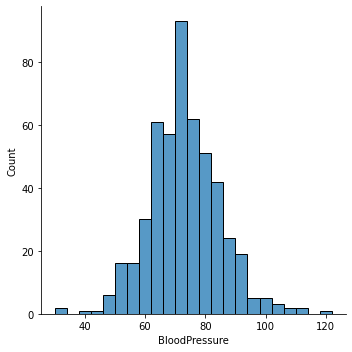

In [45]:
sns.displot(df['BloodPressure'])

In [46]:
#most common range of bp is between 60 and 80

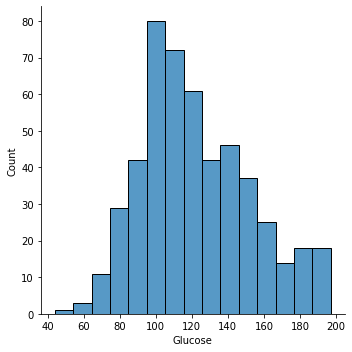

In [48]:
sns.displot(df['Glucose'])

In [49]:
#maximum glucose level is on the range of 90 to 110

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

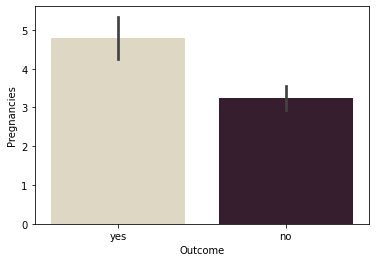

In [43]:
sns.barplot(x='Outcome',y='Pregnancies',palette = "ch:.36",data=df)

In [47]:
#high  number of pregenancies are seen in women who have diabetes

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

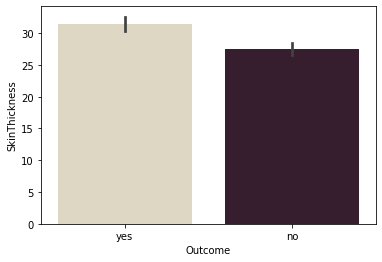

In [51]:
sns.barplot(x='Outcome',y='SkinThickness',palette = "ch:.36",data=df)

In [52]:
#slightly greater skin thickness is seen in diabetic patients compared to the ones who don not jave diabetes 

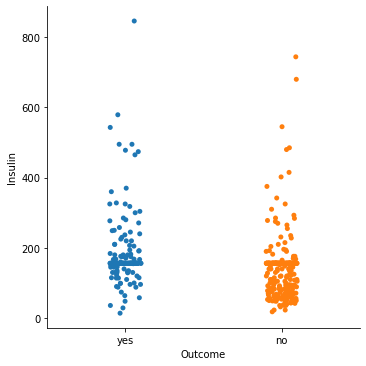

In [56]:
sns.catplot(x = "Outcome", y = "Insulin", data = df)

In [57]:
#highest insulin is of an individual with diabetes,most of the individuals without diabetes have an insulin level between 0 and almost 180

In [33]:
df['Outcome'].value_counts()

no     317
yes    182
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

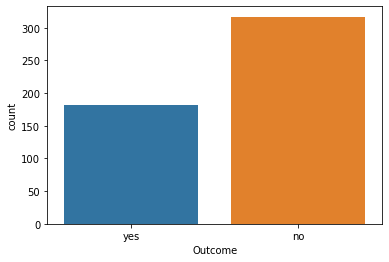

In [34]:
sns.countplot(x='Outcome',data=df)

In [ ]:
#according to the dataset, there are less number of patients who are diabetic

In [26]:
pd.get_dummies(data=df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_no,Outcome_yes
0,6,148.0,72.000000,35.000000,156.089494,33.600000,0.627,50,0,1
1,1,85.0,66.000000,29.000000,156.089494,26.600000,0.351,31,1,0
2,8,183.0,64.000000,28.921127,156.089494,23.300000,0.672,32,0,1
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,1,0
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,0,1
...,...,...,...,...,...,...,...,...,...,...
494,3,80.0,72.216842,28.921127,156.089494,32.505703,0.174,22,1,0
495,6,166.0,74.000000,28.921127,156.089494,26.600000,0.304,66,1,0
496,5,110.0,68.000000,28.921127,156.089494,26.000000,0.292,30,1,0
497,2,81.0,72.000000,15.000000,76.000000,30.100000,0.547,25,1,0


In [59]:
x = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']

In [120]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [121]:
clf = LogisticRegression(random_state=0)

In [122]:
clf.fit(x_train, y_train)

C:\Users\91866\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [123]:
clf.predict(x_test)

array(['no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no',
       'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no'], dtype=object)

In [124]:
clf.score(x_train, y_train)

0.7443609022556391

In [125]:
clf.score(x_test, y_test)

0.78

In [126]:
clf.predict_proba(x_test)[:,1]

array([0.25751169, 0.37375323, 0.73074154, 0.87055363, 0.85411859,
       0.8248049 , 0.89981477, 0.02410505, 0.13437726, 0.39918718,
       0.24035546, 0.4332217 , 0.05192702, 0.65912034, 0.28372863,
       0.04728419, 0.25671875, 0.33425234, 0.07946268, 0.81940375,
       0.4877471 , 0.31133895, 0.37202167, 0.84001943, 0.3115645 ,
       0.20567271, 0.92167416, 0.08307127, 0.26551864, 0.03520363,
       0.28412455, 0.08634767, 0.12194942, 0.75341984, 0.83837897,
       0.1065978 , 0.86378168, 0.15655766, 0.02794043, 0.54980087,
       0.75994959, 0.39482816, 0.05041592, 0.04461377, 0.64514918,
       0.89698027, 0.21465388, 0.2315229 , 0.74981381, 0.71731366,
       0.27130136, 0.15972763, 0.12880869, 0.16359814, 0.34192495,
       0.5255017 , 0.89292285, 0.08171971, 0.06229103, 0.16478824,
       0.49247083, 0.49772239, 0.02867338, 0.04496599, 0.1918654 ,
       0.67248505, 0.36068196, 0.20417693, 0.87862241, 0.53412396,
       0.15813539, 0.70374036, 0.02126459, 0.36921497, 0.16354

Confusion matrix

In [127]:
metrics.confusion_matrix(y_test, clf.predict(x_test))

array([[56,  8],
       [14, 22]], dtype=int64)

Precision,recall, f1 score, accuracy

In [128]:
print(classification_report(y_test,clf.predict(x_test)))

              precision    recall  f1-score   support

          no       0.80      0.88      0.84        64
         yes       0.73      0.61      0.67        36

    accuracy                           0.78       100
   macro avg       0.77      0.74      0.75       100
weighted avg       0.78      0.78      0.77       100



Misclassification

In [129]:
misclassification = 1 - metrics.accuracy_score(y_test, clf.predict(x_test))

In [130]:
print("Mis-Classification Rate: ",misclassification)

Mis-Classification Rate:  0.21999999999999997


In [132]:
metrics.f1_score(y_test, clf.predict(x_test), average='micro')

0.78

In [134]:
metrics.f1_score(y_test, clf.predict(x_test), average='macro')

0.7512437810945274

In [136]:
metrics.precision_recall_fscore_support(y_test,clf.predict(x_test)), 

((array([0.8       , 0.73333333]),
  array([0.875     , 0.61111111]),
  array([0.8358209 , 0.66666667]),
  array([64, 36], dtype=int64)),)